# Conjuctive grid cells  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RatInABox-Lab/RatInABox/blob/dev/demos/conjunctive_gridcells_example.ipynb)

In this demo we'll show a very simple way one could model conjuctive grid cells (Sargolini, 2006) by non-linearly combining `GridCells` and `HeadDirectionCells` using `FeedForwardLayer`.


Here's a schematic of the simulation we're going to build: 

* Grid cells are __spatially selective__ but not head direction selective
* Head direction cells are __head direction selective__ but not spatially selective
* Conjunctive grid cells are __jointly spatially and head direction selective__

<img src="../.images/demos/conjunctive_grid_cells.png" width="500" align="center">

In [1]:
# Install dependencies 
!pip install ratinabox

#Import ratinabox 
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import GridCells, HeadDirectionCells, FeedForwardLayer

#stylize plots and set figure directory for saving 
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

#...and other dependencies
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#Some global variables
N_cells = 3

### Make `GridCells` and `HeadDirectionCells` and plot their spatial and head direction selectivity


In [2]:
Env = Environment()
Ag = Agent(Env)
GCs = GridCells(Ag, params = {
    'n':N_cells,
    'gridscale':[0.2,0.4,0.6],
    'name':'GridCells',
    'color':'C1'})
HDCs = HeadDirectionCells(Ag, params={
    'n':N_cells,
    'name':'HeadDirectionCells',
    'color':'C5'})

Plot the spatial and head direction selectivity of the `GridCells` and `HeadDirectionCells` we're going to use to make the conjunctive grid cells.

* `Neurons.plot_rate_map(method="groundtruth_headdirectionaveraged")` calcultes the rate maps at all head directions, _averages over head direction_ and then plots the spatial rate map. 
* `Neurons.plot_angular_rate_map()` calculates the rate maps at all head directions and then _averages over space_ and plots the head direction rate map in polar coordinates.

Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/GridCells_ratemaps_2133.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/GridCells_angularratemaps_2133.png  & .svg


Text(0.5, 0.98, 'Head direction seletivity of grid cells (there is none)')

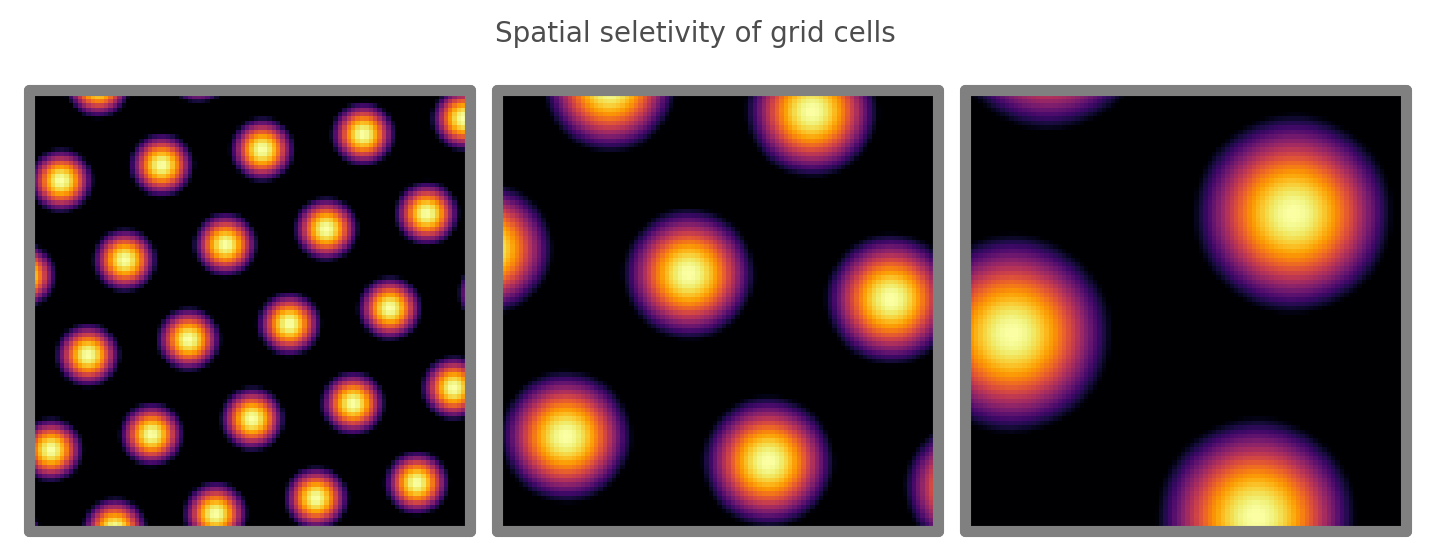

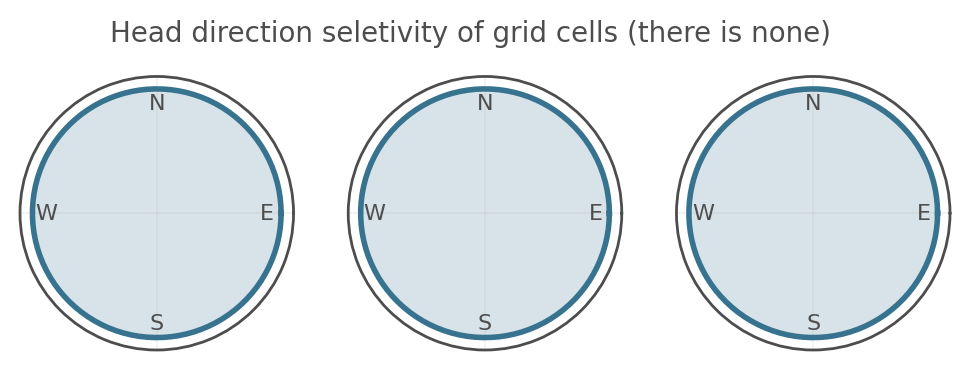

In [3]:
fig, ax = GCs.plot_rate_map(method="groundtruth_headdirectionaveraged",colorbar=False)
fig.suptitle("Spatial selectivity of grid cells")
fig, ax = GCs.plot_angular_rate_map()
fig.suptitle("Head direction selectivity of grid cells (there is none)")

Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/HeadDirectionCells_ratemaps_2149.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/HeadDirectionCells_angularratemaps_2149.png  & .svg


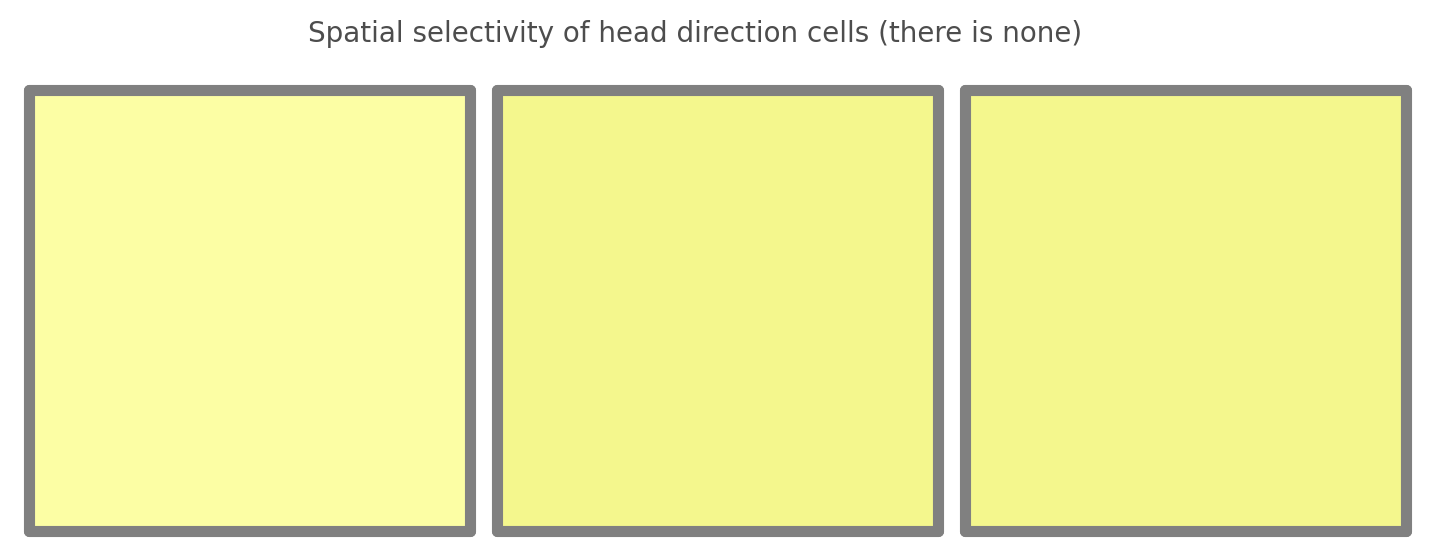

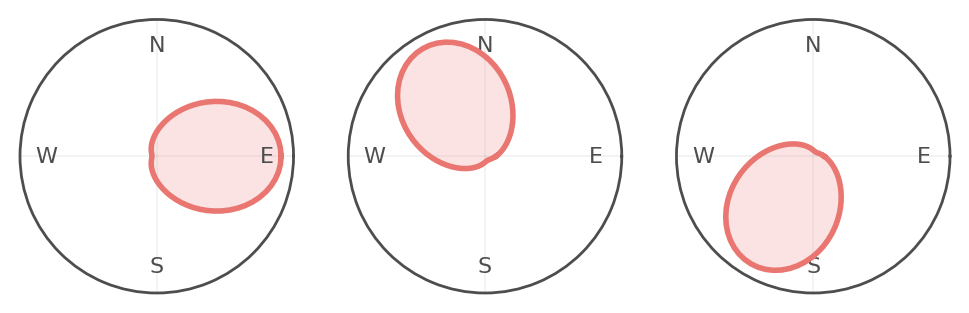

In [9]:
fig, ax = HDCs.plot_rate_map(method="groundtruth_headdirectionaveraged",colorbar=False)
fig.suptitle("Spatial selectivity of head direction cells (there is none)")
fig, ax = HDCs.plot_angular_rate_map()
# fig.suptitle("Head direction selectivity of head direction cells")

## Make conjunctive grid cells

The way we'll do this is we'll make a `FeedForwardLayer` which takes as input the `GridCells` and `HeadDirectionCells` and then non-linearly combines them to make conjunctive grid cells.

$$F(x,\phi_h) = \sigma\big( \mathsf{W}_g \cdot F_{g}(x) + \mathsf{W}_h \cdot F_{h}(\phi_{h})\big)$$

where $F_{g}(x)$ is the grid cell activity, $F_{h}(\phi_{h})$ is the head direction cell activity, $\mathsf{W}_g$ and $\mathsf{W}_h$ are the weight matrices for the grid cells and head direction cells respectively, and $\sigma$ is a non-linearity.

For each input we'll make the weight matrix the identity: $[\mathsf{W}_g]_{ij} = [\mathsf{W}_h]_{ij} = \delta_{ij}$. The non-linearity will be a relu function thresholded at 1.0, $\sigma(x) = \max(0,x-1)$.  Since the maximum firing rate of the `GridCells` and `HeadDirectionCells` is 1.0, _only_ if the grid cell is active _and_ the head direction cell are active together will the total conjunctive grid cell input overcome the threshold and fire. 

Here's how you'd write this with RatInABox...


In [5]:
CGCs = FeedForwardLayer(Ag, params={
    'n':N_cells,
    'input_layers':[GCs,HDCs],
    'activation_function':{'activation':'relu',
                           'threshold':1},
    'color':'C0'}
    )

#It's also possible to write your own activation function and have biases as well as weights. Feel free to experiment (read the documatation/paper for full info)!

CGCs.inputs['GridCells']['w'] = np.identity(N_cells)
CGCs.inputs['HeadDirectionCells']['w'] = np.identity(N_cells)

Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/FeedForwardLayer_ratemaps_2135.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/FeedForwardLayer_angularratemaps_2135.png  & .svg


Text(0.5, 0.98, 'Head direction seletivity of conjunctive grid cells (like head direction cells)')

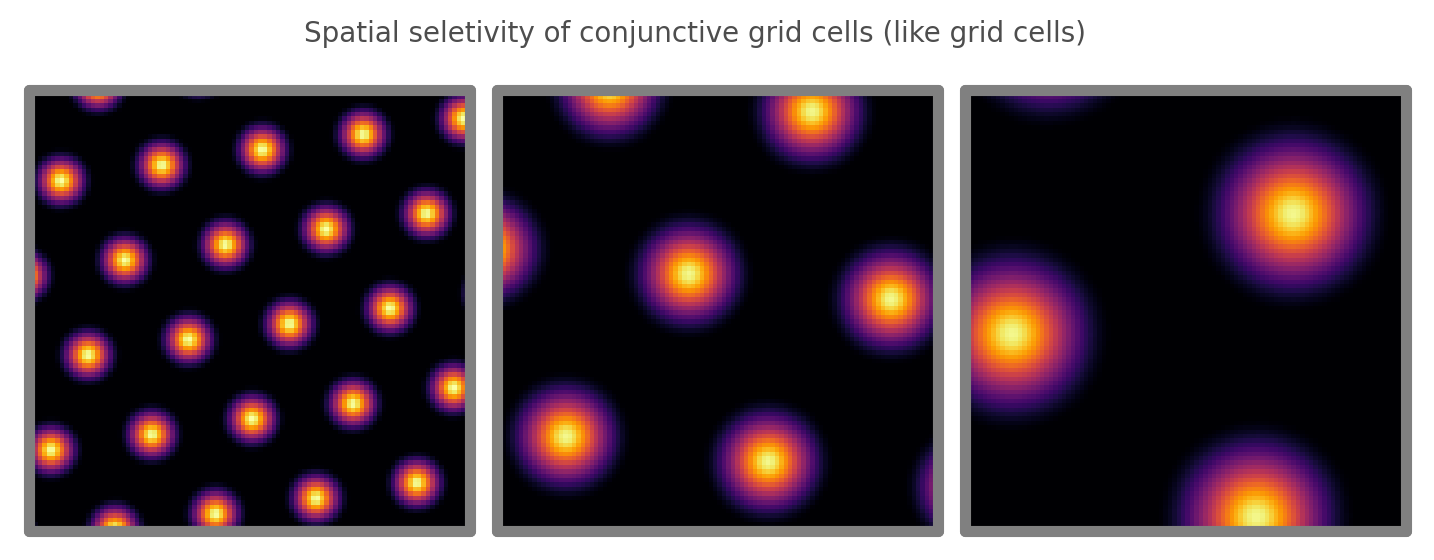

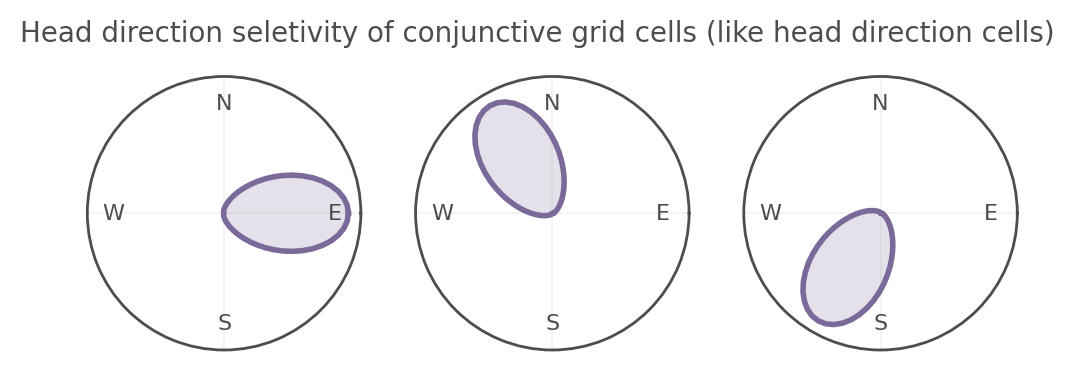

In [6]:
fig, ax = CGCs.plot_rate_map(method="groundtruth_headdirectionaveraged",colorbar=False)
fig.suptitle("Spatial selectivity of conjunctive grid cells (like grid cells)")
fig, ax = CGCs.plot_angular_rate_map()
fig.suptitle("Head direction selectivity of conjunctive grid cells (like head direction cells)")

### Simulate them to make sure they behave as expected

Final lets simulate them for two minutes and plot the firing rate data. We'll also plot the rat's trajectory and head direction to make sure the firing rate data makes sense.

We'll make the rat move under circular motion. This should be clearly visible in the head direction cell data as cells periodincal fire as the rat's head direction changes. The conjunctive grid cells should fire a bit like the grid cells do but modulated by the activity of their respective head direction cell.

Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/trajectory_2135_1.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/GridCells_firingrate_2135_1.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/HeadDirectionCells_firingrate_2135_1.png  & .svg
Figure saved to /Users/tomgeorge/Documents/RatInABox/figures/20_11_23/FeedForwardLayer_firingrate_2135_1.png  & .svg


(<Figure size 1000x248 with 1 Axes>,
 <Axes:xlabel='Time / min', ylabel='Neurons'>)

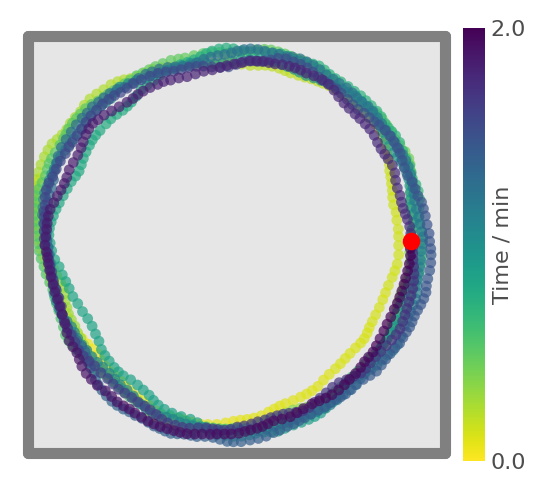

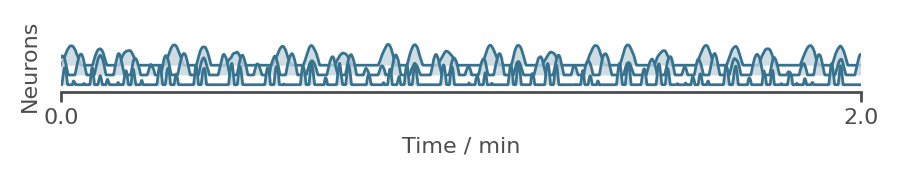

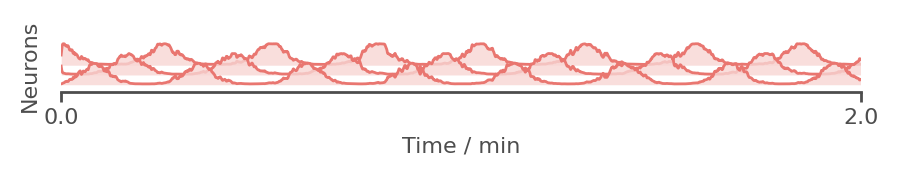

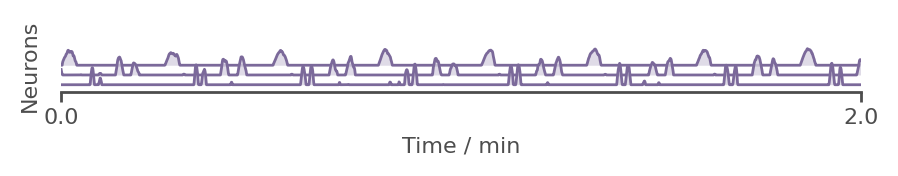

In [8]:
while Ag.t < 120:
    r = Ag.pos - Env.centre
    drift = np.array([-r[1],r[0]]) #tangential drift velocity
    drift = 0.2 * drift / np.linalg.norm(drift)
    Ag.update(drift_velocity=drift,drift_to_random_strength_ratio=4)
    GCs.update()
    HDCs.update()
    CGCs.update()


Ag.plot_trajectory(color='changing',colorbar=True)
GCs.plot_rate_timeseries()
HDCs.plot_rate_timeseries()
CGCs.plot_rate_timeseries()